In [2]:
%pylab inline
!pip install netcdf4

Populating the interactive namespace from numpy and matplotlib
     |████████████████████████████████| 4.3MB 5.2MB/s 
     |████████████████████████████████| 296kB 45.8MB/s 


In [3]:
import os
from os.path import join, exists
import xarray as xr
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files
from pandas import read_csv
import pandas as pd
import csv
import numpy as np

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#basepath = r'\\10.249.254.51\Public\Kuzmin\Experiments-Leprecon\Spectrometer\20200821'
data_dir = join('drive', 'My Drive', '研究室', 'MyLeprecon', 'SpectrometerData', '20201006-2')
ls = os.listdir(data_dir)

In [5]:
def plot_image(image_data, **kws):
    """ plot image data"""
    fig, axs = plt.subplots(2, 1)
    fig.set_size_inches([10, 8])

    axs[0].imshow(image_data)
    xlabel('pixels')
    axs[1].plot(image_data.sum(axis=0), "k")
    xlabel('pixels')
    rcParams['axes.xmargin'] = 0
    save_dir = join('drive', 'My Drive', '研究室', 'images')
    savefig(join(save_dir, "H_lamp"))

    xlim = kws.get("xlim", [0, 2058])
    [ax.set_xlim(*xlim) for ax in axs]

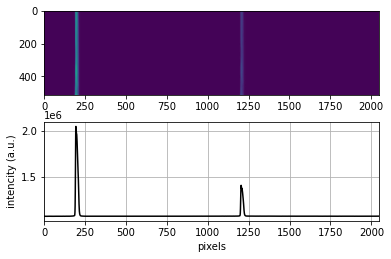

In [6]:
rcParams['axes.xmargin'] = 0
f = join(data_dir, 'Ne_475000.nc')
data = xr.open_dataset(f)
a = data.to_array()
subplot(2, 1, 1)
imshow(a[0])
subplot(2, 1, 2)
grid()
xlabel('pixels')
ylabel('intencity (a.u.)')
plot(a[0].sum(axis=0), "k")
#xlabel('pixel')
save_dir = join('drive', 'My Drive', '研究室', 'images')
savefig(join(save_dir, 'Ne_image'))
#plot_image(a[0])

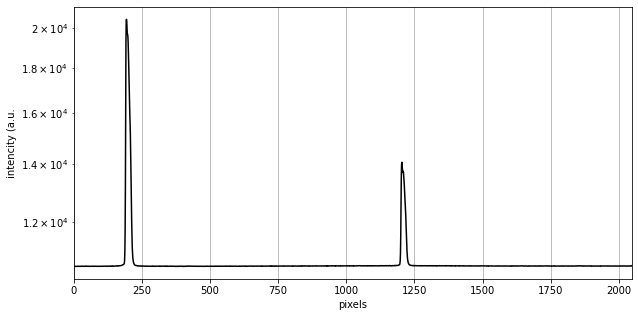

In [7]:
image_data = xr.open_dataset(join(data_dir, 'Ne_475000.nc')).to_array()[0]
x_range = np.arange(2048)
y = image_data.sum(axis=0)
xlabel('pixels')
ylabel('intencity (a.u.')
grid()
yscale('log')
plt.plot(x_range, y / 1e2, 'k')
fig=gcf()
fig.set_facecolor('w')
fig.set_size_inches([10,5])
plt.savefig(join(save_dir, "Ne-graph"))

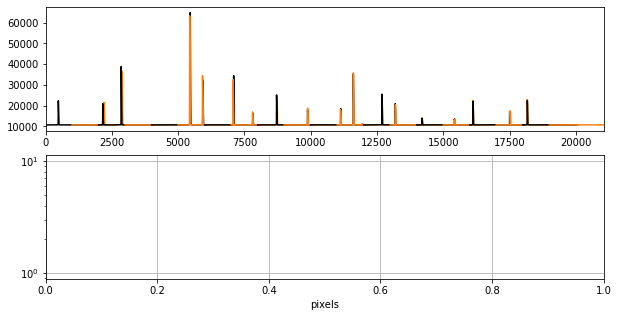

In [8]:
R = [f'Ne_{410000 + 5000*i}.nc' for i in range(20)]

x_range = np.arange(2048)
subplot(2, 1, 1)
for i,fp in enumerate(R):
    c = 'k'
    if i%2: c = 'C1'
    image_data = xr.open_dataset(join(data_dir, fp)).to_array()[0]
    x = x_range + 1000 * i
    y = image_data.sum(axis=0)
    plot(x, y / 1e2, f'{c}')
subplot(2, 1, 2)
grid()
yscale('log')
xlabel('pixels')
fig=gcf()
fig.set_facecolor('w')
fig.set_size_inches([10,5])
savefig(join(save_dir, "Ne_spectrum-1"))

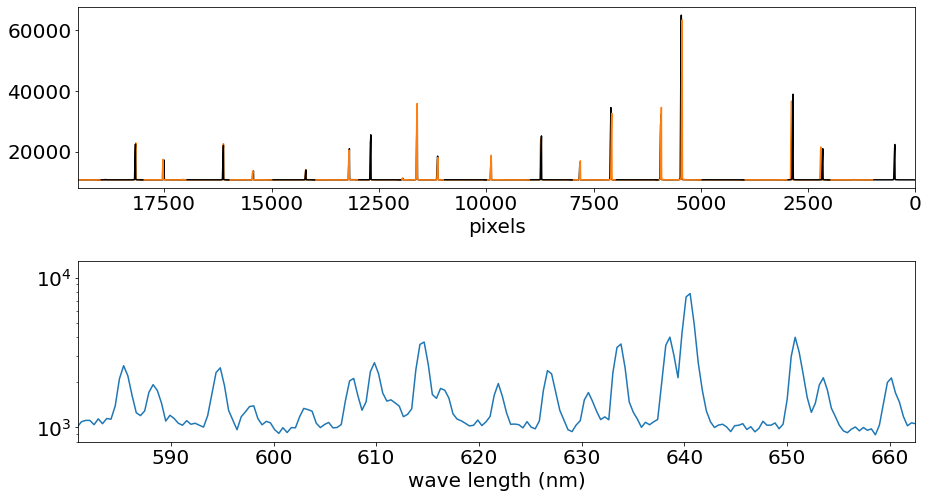

In [9]:
bpth = join('drive', 'My Drive', '研究室', 'MyLeprecon')
H_filepath = join(bpth, 'SpectrometerData', '20201016', 'H-spectrum.txt')
Ne_filepath = join(bpth, 'SpectrometerData', '20201016', 'Ne-spectrum.txt')
h_csv = read_csv(H_filepath, sep=';', skiprows=66)
ne_csv = read_csv(Ne_filepath, sep=';', skiprows=66)

h_csv["Wavelength"] = pd.to_numeric(h_csv["Wavelength"], errors="coerce")
ne_csv["Wavelength"] = pd.to_numeric(ne_csv["Wavelength"], errors="coerce")


plt.figure(figsize=(15, 8))
plt.rcParams['font.size'] = 20
plt.subplots_adjust(hspace=0.4)

R = [f'Ne_{410000 + 5000*i}.nc' for i in range(20)]

x_range = np.arange(2048)
subplot(2, 1, 1)
for i,fp in enumerate(R):
    c = 'k'
    if i%2: c = 'C1'
    image_data = xr.open_dataset(join(data_dir, fp)).to_array()[0]
    x = x_range + 1000 * i
    y = image_data.sum(axis=0)
    plot(x, y / 1e2, f'{c}')
xlabel('pixels')
xlim(19500, 0)
subplot(2, 1, 2)
grid()
yscale('log')

plot(ne_csv["Wavelength"], ne_csv["Raw data #1"])
xlim(581, 662.5)
ylim(8*1e2, 1.3*1e4)
plt.grid()
plt.xlabel('wave length (nm)')
savefig(join(save_dir, "Ne_spectrum_with_small"))


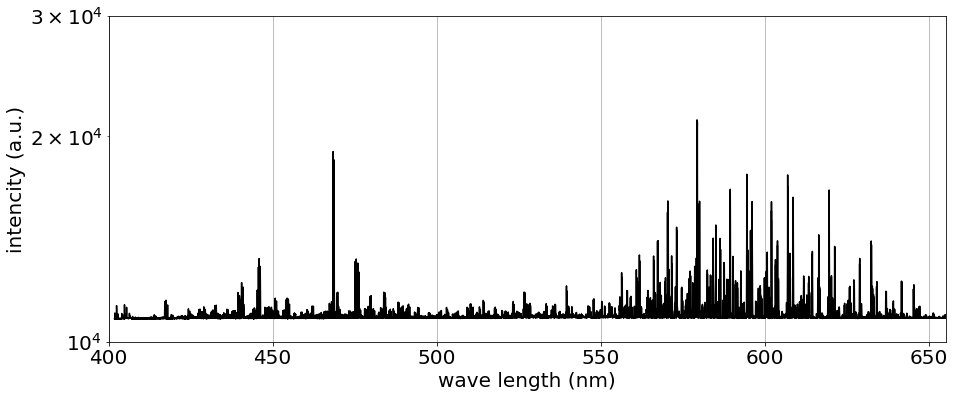

In [10]:
pixels = np.array([1500, 14500, 37000, 42800])
wave = np.array([656.279, 601.8, 486.135, 434.047])

func = np.poly1d(np.polyfit(pixels, wave, 1))
xp = np.linspace(0, 50000, 100)

R = [f'H_{410000 + 5000*i}.nc' for i in range(50)]
figure(figsize=(15, 6))
rcParams['font.size'] = 20

x_range = np.arange(2048)
for i,fp in enumerate(R):
    c = 'k'
#    if i%2: c = 'C1'
    image_data = xr.open_dataset(join(data_dir, fp)).to_array()[0]
    x = func(x_range + 1000 * i)
    y = image_data.sum(axis=0)
    plot(x, y / 1e2, f'{c}')
xlabel('wave length (nm)')
ylabel('intencity (a.u.)')
xlim(400, 655)
ylim(1e4, 3*1e4)
grid()
yscale('log')
savefig(join('drive', 'My Drive', '研究室', 'images','H_spectrum'))

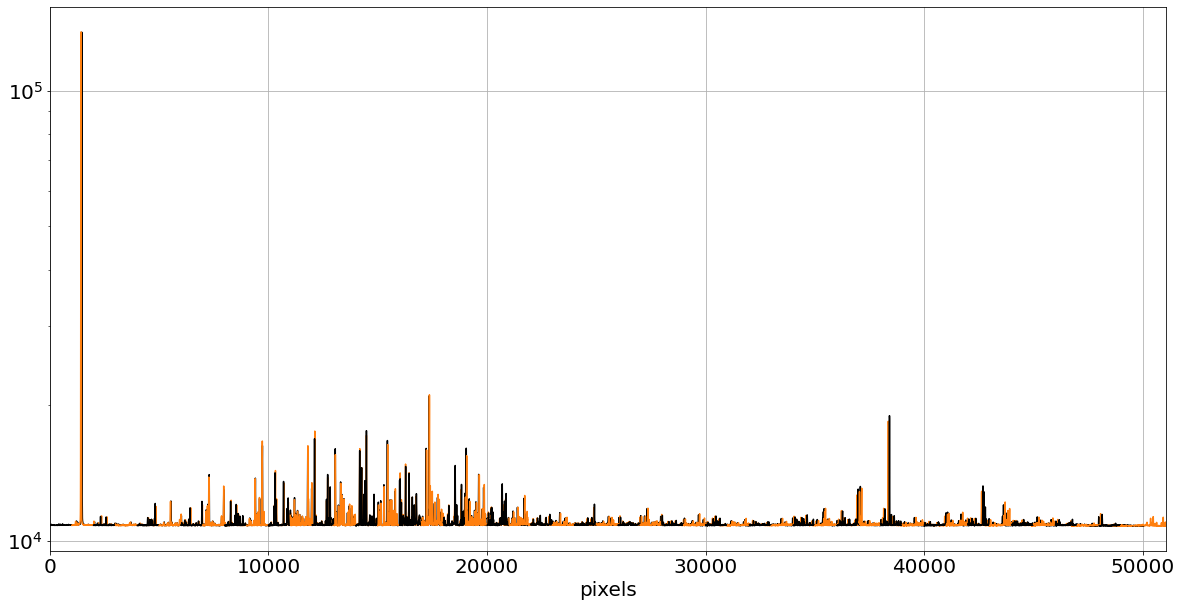

In [11]:
R = [f'H_{410000 + 5000*i}.nc' for i in range(50)]
figure(figsize=(20, 10))

x_range = np.arange(2048)
for i,fp in enumerate(R):
    c = 'k'
    if i%2: c = 'C1'
    image_data = xr.open_dataset(join(data_dir, fp)).to_array()[0]
    x = x_range + 1000 * i
    y = image_data.sum(axis=0)
    plot(x, y / 1e2, f'{c}')
xlabel('pixels')
grid()
yscale('log')
